# Introduction to the Concept of Optimisation, (Partial) Derivatives, and (Partial) Differential Equations 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eleni-vasilaki/rl-notes/blob/main/notebooks/03_derivatives.ipynb)

## The Concept of Optimisation  

Imagine you have a new amplifier, and you want to tune the sound to your liking. To do this, you adjust various knobs—bass, treble, and other settings—until you achieve the perfect sound for you. Optimisation works in a very similar way.  

In optimisation, we define a function that represents a desirable task. This function depends on many parameters, which act as **knobs** that you can adjust. Your goal is to tune these parameters so that the function behaves as desired.  

Mathematically:  

$$ 
f(x_1, x_2,\ldots, x_n) 
$$  

where $x_1, x_2,\ldots, x_n$ are the knobs.  

In many systems, we typically consider two main objectives:  

- **Minimisation**: Finding the smallest possible value of a function, such as minimising the error or loss function in a system.  
- **Maximisation**: Finding the largest possible value, such as maximising utility, reward, or efficiency.  

### A Metaphor for Gradient-Based Optimisation  

Now, imagine you are in a vast landscape, but you are **blindfolded**. You cannot see the full terrain, but you can **feel the steepness and direction of the slope—the gradient—of the ground beneath you**. If your goal is to reach the lowest point, you would follow the slope downward.  

This is a metaphor for the minimisation problem. The slope provides information about how to move toward a **local minimum**—the lowest point you can reach based on what you can sense. However, since you cannot see the entire landscape, there may be a deeper valley elsewhere, but you have no way of knowing that.  

A crucial aspect of this process is that not all paths lead to the absolute lowest point. You might get stuck in a **local minimum**, just as a hiker might find themselves in a small valley while a deeper one exists further away. This challenge—navigating towards the best possible solution—is central to optimisation techniques.  

This process mirrors how modern machine learning methods optimise their parameters to perform tasks efficiently. They iteratively adjust parameters, using information from the **derivatives** of the function, to improve performance.  

To fully understand how optimisation works, we need to explore **derivatives**—which describe how functions change and help guide us in adjusting parameters effectively. This will be the key to understanding how machine learning models learn to perform their tasks.  

## Speed as a Derivative  

The following example introduces derivatives in an **intuitive** way. Consider a car moving along a straight path. We can plot its position over time on a graph. The speed of the car at any given moment is the rate at which its position changes with time. Mathematically, this is the slope of the tangent line to the position-time graph at that point.  

Let's illustrate this with an example. Suppose the position of the car (in meters) at time $t$ (in seconds) is given by the function $s(t) = t^2$. We can calculate the speed of the car at any given time by taking the derivative of $s(t)$ with respect to $t$.  

In mathematics, particularly in calculus, the concept of a derivative plays a crucial role in understanding how quantities change in relation to one another. At its core, the derivative of a function can be introduced as the ratio of the change in the value of the function ($\Delta s$) to the change in the variable ($\Delta t$). This ratio is denoted as $\frac{\Delta s}{\Delta t}$ and represents the average rate of change of the function over the interval $\Delta t$.  

If we want to be very precise, we would like $\Delta t$ to be small; otherwise, we calculate an average speed that does not precisely capture the movement of the car. For instance, two cars may have the same average speed, but one of the drivers was moving at a much higher speed than the other and took a break somewhere on the way. If you want to determine who is the fastest driver, using a large $\Delta t$ can be misleading.  

As $\Delta t$ approaches zero, this ratio gives us the instantaneous rate of change of the function at a point, which is the derivative of the function at that point. In formal mathematical terms, the derivative of a function $s$ with respect to a variable $t$ is defined as the limit of $\frac{\Delta s}{\Delta t}$ as $\Delta t$ approaches zero:  

$$
\lim_{\Delta t \to 0} \frac{\Delta s}{\Delta t}
$$  

This limit, if it exists, provides a precise measure of how the function $s$ changes at an instant when $t$ changes by an infinitesimally small amount. The derivative, therefore, captures the essence of change, offering insights into the behavior of functions that model real-world phenomena and is commonly used in machine learning.  

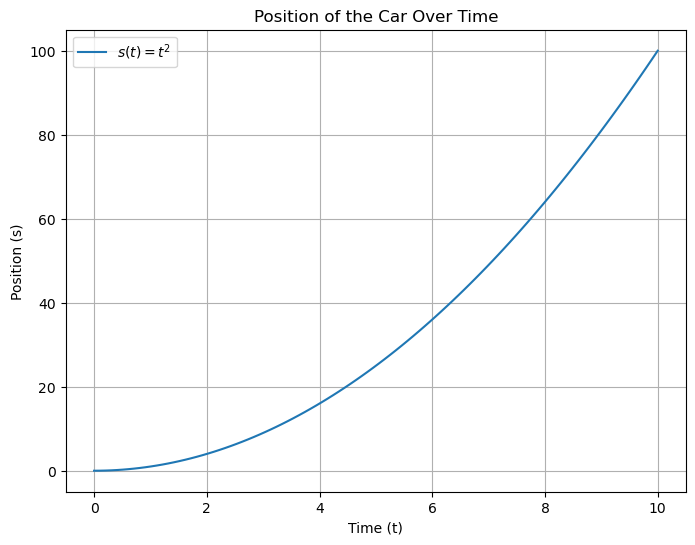

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time range
t = np.linspace(0, 10, 100)

# Position function: s(t) = t^2
s = t**2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, s, label='$s(t) = t^2$')
plt.xlabel('Time (t)')
plt.ylabel('Position (s)')
plt.title('Position of the Car Over Time')
plt.legend()
plt.grid(True)
plt.show()

To understand the concept of the derivative as the speed of an object, let's calculate the speed of a car at a specific time, $t = 4$ seconds, using the mathematical function $s(t) = t^2$, which represents the car's position in meters as a function of time in seconds.

### Calculating Speed at $t = 4$ Seconds

The speed of the car at any moment is the rate at which its position changes with time, which is mathematically represented by the derivative of the position function with respect to time. For the function $s(t) = t^2$, the derivative $s'(t)$ represents the car's speed at time $t$.

To find the speed at $t = 4$ seconds, we calculate the derivative of $s(t)$ at this point:

$$
s'(t) = \lim_{\Delta t \to 0} \frac{s(t + \Delta t) - s(t)}{\Delta t}
$$

Given $s(t) = t^2$, this becomes:

$$
s'(t) = \lim_{\Delta t \to 0} \frac{(t + \Delta t)^2 - t^2}{\Delta t} = \lim_{\Delta t \to 0} \frac{t^2 + 2t\Delta t + (\Delta t)^2 - t^2}{\Delta t} = \lim_{\Delta t \to 0} (2t + \Delta t)
$$

Thus, the derivative $s'(t)$ simplifies to $2t$, indicating that the speed of the car at time $t$ is $2t$ meters per second.

At $t = 4$ seconds:

$$
s'(4) = 2(4) = 8 \text{ meters per second}
$$

Therefore, at $t = 4$ seconds, the speed of the car is 8 meters per second.

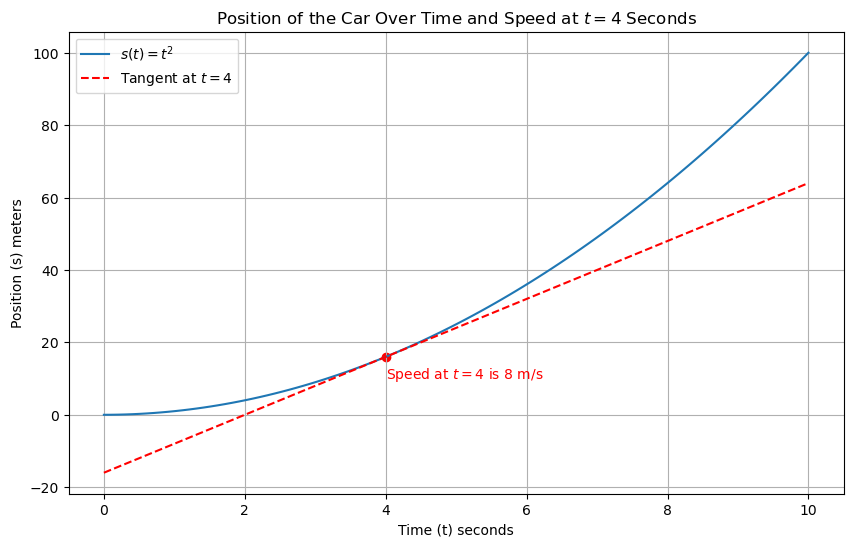

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time range
t = np.linspace(0, 10, 100)
s = t**2           # Position function
s_prime = 2 * t    # Derivative (speed)

# Plot the position function
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='$s(t) = t^2$')

# Mark the point at t = 4 and draw the tangent line
plt.scatter(4, 16, color='red')
plt.text(4, 10, 'Speed at $t=4$ is $8$ m/s', color='red')

tangent_line = 8 * (t - 4) + 16
plt.plot(t, tangent_line, 'r--', label='Tangent at $t=4$')

plt.xlabel('Time (t) seconds')
plt.ylabel('Position (s) meters')
plt.title('Position of the Car Over Time and Speed at $t=4$ Seconds')
plt.legend()
plt.grid(True)
plt.show()

We can generalise the concept of the derivative beyond specific examples to apply it to a wide range of functions. The derivative measures how a function changes as its input changes by a small amount, providing a powerful tool for analysing the dynamics of systems modelled by functions. In the example of speed, we have been looking at a function $s(t)$, but unless the focus is on systems that change over time (such as a car), we generally denote a function as $f(x)$ and its derivatives accordingly.

## Generalised Definition of the Derivative  

The derivative of a function at a point is the limit of the average rate of change of the function as the interval over which the change is measured approaches zero. Formally, if we have a function $f(x)$, the derivative of $f$ at a point $x$ is given by:  

$$
f'(x)= \frac{df}{dx}= \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$  

In this definition:  

- $f'(x)$ is the derivative of $f$ at $x$, representing the instantaneous rate of change of $f$ with respect to $x$. We will be using $\frac{df}{dx}$ for the derivative because it allows us to specify with respect to which variable we take the derivative, in this case $x$. This is important as in most interesting problems we have more than one variable involved.  
- $\Delta x$ is a small change in $x$, and as $\Delta x$ approaches zero, we examine the behaviour of $f$ at increasingly smaller intervals around $x$. We can think of it as the difference between two values that are not far apart, for instance, $\Delta x= x_{i+1}-x_{i}$, with $i$ being an index over nearby values.  
- $f(x + \Delta x) - f(x)$ is the change in the function $f$ as the input changes from $x$ to $x + \Delta x$.  
- The ratio $\frac{f(x + \Delta x) - f(x)}{\Delta x}$ represents the average rate of change of $f$ over the interval $\Delta x$.  

By taking the limit of this ratio as $\Delta x$ approaches zero, we capture the essence of the derivative as the instantaneous rate of change of the function at a point. This concept extends beyond physical notions like speed or acceleration to include any situation where understanding the rate at which one quantity changes with respect to another is valuable.  

Understanding the derivative in this generalised form allows us to apply calculus to a vast array of functions and problems across many disciplines, and, most importantly for this module, machine learning. For instance, in machine learning, we take the derivative of the objective function with respect to the parameters we wish to adjust, to achieve what we call gradient-based learning. The objective function is also known as the Error or Loss function, which we aim to minimize in the case of supervised learning, or as the Reward or Utility function, which we aim to maximize, as in Reinforcement Learning.  

### The $\delta$ Notation  

In some settings, the derivative is often discussed using the $\delta$ notation, especially when delving into the formal definitions of limits and continuity. This notation is typically used to denote an infinitesimally small change, highlighting the precision required in mathematical proofs. While the $\Delta$ notation suggests a finite change suitable for practical approximations, and $\delta x$ is often used for infinitesimally small changes, in this course, we will not strictly differentiate between them.  

$$
f'(x) = \lim_{\delta x \to 0} \frac{f(x + \delta x) - f(x)}{\delta x}
$$  

# Exercise 

Plot the function $y=-x^2$. Find the point where the derivative is equal to 0 and plot the tangent line. Is this a minimum or a maximum of the plot?

<details>
<summary>Show Solution</summary>

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the function y = - x^2
def f(x):
    return -x**2

# Define the derivative of the function f(x)
def df(x):
    return -2*x

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Generate y values using the function y = x^2
y_values = f(x_values)

# Find the point where the derivative is equal to 0
zero_derivative_point = 0  # Since the derivative of x^2 is 2x, the derivative is 0 at x = 0

# Calculate the corresponding y value
zero_derivative_y = f(zero_derivative_point)

# Plot the function y = -x^2
plt.plot(x_values, y_values, label='y = - x^2')

# Plot the tangent line at the point where the derivative is 0
tangent_line_x = x_values
tangent_line_y = y_values*0
plt.plot(tangent_line_x, tangent_line_y, color='green', linestyle='--', label='Tangent Line at Zero Derivative Point')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = - x^2 and Tangent Line at Zero Derivative Point')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
```
</details>

# Exercise
Use the definition of the derivative to calculate the derivatives of the following functions:
1. **Constant Function**: $f(x) = c$, where $c$ is a constant.
2. **Linear Function**: $f(x) = mx + b$, where $m$ and $b$ are constants.
3. **Quadratic Function**: $f(x) = ax^2 + bx + c$, where $a$, $b$, and $c$ are constants.
4. **Absolute Value Function**: $f(x) = |x|$.
5. **Square Root Function**: $f(x) = \sqrt{x}$. Hint: make use of $a^2-b^2=(a-b)(a+b)$. First apply the definition, then you will need to multiply and divide with the appropriate quantity.
6. **Reciprocal Function**: $f(x) = \frac{1}{x}$, where $x \neq 0$.

<details>
<summary>Show Solution</summary>

1. **Constant Function**: $f(x) = c$, where $c$ is a constant.
$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{c - c}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{0}{\Delta x} = 0$$

2. **Linear Function**: $f(x) = mx + b$, where $m$ and $b$ are constants.
$$f'(x) = \lim_{\Delta x \to 0} \frac{(mx + m\Delta x + b) - (mx + b)}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{m\Delta x}{\Delta x} = m$$

3. **Quadratic Function**: $f(x) = ax^2 + bx + c$, where $a$, $b$, and $c$ are constants.
$$f'(x) = \lim_{\Delta x \to 0} \frac{a(x + \Delta x)^2 + b(x + \Delta x) + c - (ax^2 + bx + c)}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{ax^2 + 2ax\Delta x + a(\Delta x)^2 + bx + b\Delta x + c - ax^2 - bx - c}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{2ax\Delta x + a(\Delta x)^2 + b\Delta x}{\Delta x} = 2ax + b$$

4. **Absolute Value Function**: $f(x) = |x|$.
Derivative depends on the sign of $x$:
If $x > 0$, $f'(x) = 1$.
If $x < 0$, $f'(x) = -1$.
At $x = 0$, the derivative is not defined. We can define subderivatives, but this goes beyond the scope of this module.

5. **Square Root Function**: $f(x) = \sqrt{x}$. Hint: make use of $a^2-b^2=(a-b)(a+b)$. First apply the definition, then you will need to multiply and divide with the appropriate quantity.
$$f'(x) = \lim_{\Delta x \to 0} \frac{\sqrt{x + \Delta x} - \sqrt{x}}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{\sqrt{x + \Delta x} - \sqrt{x}}{\Delta x} \cdot \frac{\sqrt{x + \Delta x} + \sqrt{x}}{\sqrt{x + \Delta x} + \sqrt{x}}$$
$$= \lim_{\Delta x \to 0} \frac{x + \Delta x - x}{\Delta x(\sqrt{x + \Delta x} + \sqrt{x})}$$
$$= \lim_{\Delta x \to 0} \frac{\Delta x}{\Delta x(\sqrt{x + \Delta x} + \sqrt{x})}$$
$$= \lim_{\Delta x \to 0} \frac{1}{\sqrt{x + \Delta x} + \sqrt{x}} = \frac{1}{2\sqrt{x}}$$

6. **Reciprocal Function**: $f(x) = \frac{1}{x}$, where $x \neq 0$.
$$f'(x) = \lim_{\Delta x \to 0} \frac{\frac{1}{x + \Delta x} - \frac{1}{x}}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{\frac{x - (x + \Delta x)}{x(x + \Delta x)}}{\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{-\Delta x}{x(x + \Delta x)\Delta x}$$
$$= \lim_{\Delta x \to 0} \frac{-1}{x(x + \Delta x)} = -\frac{1}{x^2}$$

</details>


## Calculating Derivatives in Practice

Direct calculation of derivatives from definitions can be cumbersome. Instead, we use a set of memorised rules for derivatives of commonly encountered functions, alongside general rules of differentiation.

### Key Derivatives for Machine Learning

- **Power Function**: The derivative of $x^n$ is $n \cdot x^{n-1}$.
   Exercise: Calculate for n=2 (quadratic loss function) and $n=-1$ (useful for functions involving reciprocals).

- **Logarithmic Function**: The derivative of $\log(x)$ is $\frac{1}{x}$, important for entropy calculations.

- **Exponential Function**: The derivative of $e^x$ is $e^x$, essential in models involving growth or decay.


# Exercise

- **ReLU Function**: This is used in neural networks. Calculate the derivative of $ReLU(x) = \max(0, x)$. Note that at $x = 0$, we handle the discontinuity typically by defining the derivative as 0 or 1, based on the context.

- **Power function $x^n$**: Prove that the derivative of $x^n$ with respect to $x$ is $nx^{n-1}$.

<details>
<summary>Show Solution</summary>

- **ReLU Function**: To compute its derivative, we consider three cases:  

1) For $ x > 0 $, the function behaves as $ f(x) = x $, which is a linear function with slope $ 1 $. Therefore, its derivative is $ f'(x) = 1 $ for all $ x > 0 $.  

2) For $ x < 0 $, the function is constant, $ f(x) = 0 $, so its derivative is $ f'(x) = 0 $ for all $ x < 0 $.  

3) At $ x = 0 $, the function has a discontinuous derivative because it switches from a constant function ($ 0 $ for $ x < 0 $) to a linear function ($ x $ for $ x > 0 $). Mathematically, the left-hand derivative is $ 0 $ and the right-hand derivative is $ 1 $, meaning the derivative at $ x = 0 $ is **not defined** in the strict sense.  

In practical applications (e.g., deep learning frameworks), the derivative at $ x = 0 $ is often **assigned** a value such as, e.g. $x=0$.

- **Power function $x^n$**: Prove that the derivative of $x^n$ with respect to $x$ is $nx^{n-1}$.

Starting with the definition of the derivative:

$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

For $f(x) = x^n$, this becomes:

$$f'(x) = \lim_{\Delta x \to 0} \frac{(x + \Delta x)^n - x^n}{\Delta x}$$

Consider $(x + \Delta x)^n$ as the result of multiplying $(x + \Delta x)$ with itself $n$ times. This process yields terms including $x^n$, $\Delta x^n$, and every possible combination of $x$ and $\Delta x$ with their powers summing up to $n$. Specifically:

1. The term $x^n$ arises from multiplying $x$ in each of the $n$ factors.
2. The term $\Delta x^n$ results from multiplying $\Delta x$ in each of the $n$ factors.
3. The terms of particular interest for the derivative, $nx^{n-1}\Delta x$, arise because, in the process of multiplying $(x + \Delta x)$ $n$ times, the scenario where $x$ is multiplied $(n-1)$ times and $\Delta x$ once contributes to $n$ distinct combinations due to the properties of combinatorics.

Subtracting $x^n$ and dividing by $\Delta x$, the terms involving higher powers of $\Delta x$ become negligible as $\Delta x \to 0$, leaving:

$$\lim_{\Delta x \to 0} \frac{nx^{n-1}\Delta x + \text{higher order terms of } \Delta x}{\Delta x} = nx^{n-1} + \lim_{\Delta x \to 0} \text{terms involving }\Delta x$$

As $\Delta x \to 0$, all terms involving $\Delta x$ vanish, except for the term $nx^{n-1}$:

$$f'(x) = nx^{n-1}$$

Thus, by considering $(x + \Delta x)^n$ as the multiplication of $(x + \Delta x)$ $n$ times, we demonstrate that the derivative of $x^n$ with respect to $x$ is $nx^{n-1}$.

</details>

### General Rules for Differentiation and Proofs

- **Addition Rule**: The derivative of a sum is the sum of the derivatives.
  $$
  \frac{d}{dx}(f(x) + g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)
  $$

  **Proof**: Given the limit definition of a derivative, we can express the     derivative of a sum as follows:
  $$
  \lim_{\Delta x \to 0} \frac{(f(x+\Delta x) + g(x+\Delta x)) - (f(x) + g(x))}   {\Delta x}
  $$
  This simplifies to:
  $$
  \lim_{\Delta x \to 0} \left(\frac{f(x+\Delta x) - f(x)}{\Delta x} +   \frac{g(x+\Delta x) - g(x)}{\Delta x}\right),
  $$
  which is the definition of $\frac{d}{dx}f(x) + \frac{d}{dx}g(x)$.


- **Multiplication Rule**: The product of two functions differentiates as follows:
  $$
  \frac{d}{dx}(f(x) \cdot g(x)) = \frac{df(x)}{dx} \cdot g(x) + f(x) \cdot \frac{dg(x)}{dx}
  $$
  **Proof**: Using the definition of the derivative, we approach the product rule  as follows:
   First, consider the definition of the derivative for the product of two   functions $f(x)$ and $g(x)$:
   $$
   \lim_{\Delta x \to 0} \frac{f(x+\Delta x)g(x+\Delta x) - f(x)g(x)}{\Delta x}
   $$
   To facilitate the application of the limit, we add and subtract $f(x)g(x+\Delta x)$ inside the numerator:
  $$
  \lim_{\Delta x \to 0} \frac{f(x+\Delta x)g(x+\Delta x) - f(x)g(x+\Delta x) +  f(x)g(x+\Delta x) - f(x)g(x)}{\Delta x}
  $$
  This rearrangement allows us to separate the expression into two parts:
  $$
  \lim_{\Delta x \to 0} \left( \frac{f(x+\Delta x)g(x+\Delta x) - f(x)g(x+\Delta x)}{\Delta x} + \frac{f(x)g(x+\Delta x) - f(x)g(x)}{\Delta x} \right)
  $$
  Simplifying each part individually, we observe that the first part approaches   $\frac{df(x)}{dx} \cdot g(x)$ and the second part approaches $f(x) \cdot \frac{dg(x)}{dx}$ as $\Delta x$ approaches 0:
  $$
  \lim_{\Delta x \to 0} \left( \frac{f(x+\Delta x) - f(x)}{\Delta x} \cdot g(x+\Delta x) + f(x) \cdot \frac{g(x+\Delta x) - g(x)}{\Delta x} \right)
  $$
  As $\Delta x \to 0$, $g(x+\Delta x)$ becomes $g(x)$, so the expression   simplifies to:
  $$
  \frac{df(x)}{dx} \cdot g(x) + f(x) \cdot \frac{dg(x)}{dx}.
  $$

- **Chain Rule**: For composite functions, the derivative is calculated as:
  $$
  \frac{d}{dx}f(g(x)) = \frac{df(g(x))}{dg(x)} \cdot \frac{dg(x)}{dx}
  $$

  **Proof**: 
  Using the definition of the derivative:
  $$
  \frac{d}{dx}f(g(x)) =\lim_{\Delta x \to 0} \frac{f(g(x+\Delta x)) - f(g(x))}{\Delta x}
  $$

  We re-write this expression as:
  $$\lim_{\Delta x \to 0} \frac{f(g(x+\Delta x)) - f(g(x))}{g(x+\Delta x)-g(x)} \cdot \frac{g(x+\Delta x)-g(x)}{\Delta x} $$

  Define $\Delta y = g(x + \Delta x) - g(x)$, hence, $ g(x + \Delta x)=g(x)+\Delta y  $, which means we are looking at how $g(x)$ changes with a small change in $x$. Now, we can express the change in $f$ with respect to $y$ as:
  $$
  \lim_{\Delta x \to 0} \frac{f(g(x) + \Delta y) - f(g(x))}{\Delta y} \cdot \frac{g(x+\Delta x)-g(x)}{\Delta x}
  $$
  We note that $\Delta y$ approaches 0 as $\Delta x$ approaches 0. By definition, the expression $\lim_{\Delta y \to 0} \frac{f(g(x) + \Delta y) - f(g(x))}{\Delta y}$ is the derivative $\frac{df(g(x))}{dg(x)}$. We also note that $\frac{dg(x)}{dx}=\frac{g(x+\Delta x)-g(x)}{\Delta x}$. We, therefore, derive the chain rule:
  $$
  \frac{d}{dx}f(g(x)) = f'(g(x)) \cdot g'(x).
  $$


# Exercise 

Differentiation of the Quotient of Two Functions.

What will you do in case of division of two functions?

**Hint:** Use the multiplication rule and write the denominator as a multiplicative term raised to the power of -1.

<details>
<summary>Show Solution</summary>


To differentiate the quotient of two functions $f(x)$ and $g(x)$, you can use the multiplication rule by considering the division as  

$$
f(x) \cdot g(x)^{-1}
$$  

- First, apply the product rule:  

$$
\frac{d}{dx}[f(x)g(x)^{-1}] = f'(x)g(x)^{-1} + f(x)\frac{d}{dx}[g(x)^{-1}].
$$  

- Then, use the chain rule to calculate 
$$ 
\frac{d}{dx}[g(x)^{-1}]=- g(x)^{-2} g'(x).
$$ 

- Combining these, the formula simplifies to  

$$
\frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2},
$$  

demonstrating the quotient rule.

</details>

# Exercise

Find the derivatives of the functions below using the rules of differentiation.

1. $f(x) = x^3 + \log(x) - x^{-1}$ 
2. Quadratic loss function: $L(x) = (x - c)^2$
3. Quadratic loss function: $L(x) = (g(x) - c)^2$
4. Sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-x}}$


<details>
<summary>Show Solution</summary>


**1. $f(x) = x^3 + \log(x) - x^{-1}$**

To find $\frac{df}{dx}$, we use the power rule, the derivative of the logarithm, and the power rule for negative exponents:

$$
\frac{df}{dx} = 3x^2 + \frac{1}{x} + x^{-2}
$$

Simplifying, we get:

$$
\frac{df}{dx} = 3x^2 + \frac{1}{x} + \frac{1}{x^2}
$$


**2. Quadratic loss function: $L(x) = (x - c)^2$**

The derivative with respect to $x$ is:

$$
\frac{dL}{dx} = 2(x - c)
$$


**3. Quadratic loss function: $L(x) = (g(x) - c)^2$**

The derivative with respect to $x$ is:

$$
\frac{dL}{dx} = 2(g(x) - c) \frac{dg(x)}{dx}
$$


**4. Sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-x}}$**


To derive $\sigma'(x)$, we write  $\sigma(x) = (1 + e^{-x})^{-1}$. 
$$
\sigma'(x) = \frac{d}{dx}[(1 + e^{-x})^{-1}]
$$

This involves using the chain rule where if $u = 1 + e^{-x}$, then $\sigma(x) = u^{-1}$ and we find:

$$
\sigma'(x) = -1 \cdot u^{-2} \cdot \frac{du}{dx}
$$

Calculating $\frac{du}{dx}$ gives:

$$
\frac{du}{dx} = \frac{d}{dx}(1 + e^{-x}) = e^{-x}(-1) = -e^{-x}
$$

Substituting $\frac{du}{dx}$ back:

$$
\sigma'(x) = -1 \cdot (1 + e^{-x})^{-2} \cdot (-e^{-x}) = \frac{e^{-x}}{(1 + e^{-x})^2}=\frac{1}{1 + e^{-x}}\frac{e^{-x}}{1 + e^{-x}}
$$

Finally, we can express $\sigma'(x)$ in terms of $\sigma(x)$ itself:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

</details>

## Partial derivatives

Imagine a room full of light bulbs, each emitting a different color. In the same room, there is a set of analog control knobs, but you have no idea which knob controls which light. Moreover, since the knobs are analog, you can continuously adjust them to increase or decrease the intensity of the lights.

Now, you want to achieve a specific lighting effect in the room by adjusting the colors and brightness levels. However, if you start turning all the knobs at the same time, you will have no way of knowing which knob affects which light or whether you should turn a knob clockwise or anticlockwise to achieve the desired effect.

A more systematic approach is needed:
- Instead of adjusting all the knobs at once, you turn only one knob at a time while keeping the others fixed.
- By observing how the lighting changes in response to each individual knob, you can figure out which knob controls which light and how the brightness of each light is affected.
- Once you understand these individual effects, you can combine them to achieve the exact lighting atmosphere you desire.

This idea is exactly why partial derivatives are introduced in mathematics.

When dealing with a function of many variables, it is often unclear how each variable affects the output. If we change all variables at once, we lose control over the individual contributions. Instead, by computing partial derivatives, we analyze the effect of each variable separately, keeping all others constant.

This fundamental idea is crucial in many areas, including optimization and machine learning.

### Definition

Partial derivatives represent the rate of change of a function with respect to one variable, holding others constant. For a function $f(x, y, \ldots)$, the partial derivative with respect to $x$ is denoted as $\frac{\partial f}{\partial x}$ and is defined by the formula:

$$\frac{\partial f}{\partial x} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x, y, \ldots) - f(x, y, \ldots)}{\Delta x}$$

### Example
Consider the function $f(x, y) = x^2y + y^3$. 

The partial derivative of $f$ with respect to $x$ is calculated as follows:

$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(x^2y + y^3)= 2xy$$

This calculation holds $y$ constant and differentiates $f$ with respect to $x$, illustrating how $f$ changes as $x$ varies, with $y$ treated as if it had a fixed value (e.g., $y=c$).

Similarly the partial derivative of $f$ with respect to $y$ is given by differentiating $f$ with respect to $y$, treating $x$ as a constant:

$$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(x^2y + y^3)= x^2 + 3y^2$$


## The $\nabla f$ Notation
In Machine learning, the gradient of a scalar function $f(x_1, x_2, \ldots, x_n)$, is typically denoted by $\nabla f$, is defined as:

$$\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)$$

### Example
Consider the same function as above: $f(x, y) = x^2y + y^3$. The gradient, denoted by $\nabla$, is a compact way to express all the partial derivatives of the function with respect to its variables:
$$ \nabla f = (2xy, x^2 + 3y^2).$$

## Differential Equations and Partial Differential Equations  

Interesting systems are almost never static—they change and evolve over time. Whether we are modeling the motion of a car, the spread of a virus, temperature variations in a material, or learning dynamics in machine learning, we need a way to describe how quantities evolve rather than just their static values.  

Since these systems change over time, the natural mathematical tool to describe them is the derivative—which tells us how a quantity changes in response to another variable (often time). When we encounter equations that involve derivatives, we call them differential equations.  

In many cases, a system is influenced by multiple interacting variables, not just one. For example, the temperature in a room depends on both time and space, and optimizing a complex machine learning model involves many parameters that change simultaneously. In such cases, we extend our framework to partial derivatives, which measure how a function changes with respect to one variable while keeping the others fixed.  

When an equation includes partial derivatives, we call it a partial differential equation. These equations are extremely powerful and are used in physics, finance, engineering, and machine learning, where we often need to model complex, evolving systems with multiple interacting factors.  

### Definitions  

A differential equation defines a relationship between a function and its derivatives, crucial for modeling dynamic systems.  

$$
F\left(x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, \dots \right) = 0
$$  

where $y(x)$ is an unknown function. Example:  

$$
\frac{dy}{dx} = 4x + 7.
$$    

A partial differential equation (PDE) is an equation that involves an unknown function  
$ u(x_1, x_2, \dots, x_n) $ of $ n $ independent variables and its partial derivatives.  

A first-order partial differential equation with $n$ independent variables has the general form:  

$$
F\left( x_1, x_2, \dots, x_n,\, u,\, \frac{\partial u}{\partial x_1},\, \frac{\partial u}{\partial x_2},\, \dots,\, \frac{\partial u}{\partial x_n}\right) = 0,
$$  

where $u( x_1, x_2, \dots)$ is the unknown function. Example:  

$$
\frac{\partial u}{\partial x_1} + \frac{\partial u}{\partial x_2} = x_1 + x_2,
$$  

with $u$ being a function of $x_1$ and $x_2$, i.e. $u(x_1,x_2)$.  

### Solving Differential Equations Numerically  

While many differential equations can be solved exactly, in practice, we often need numerical approximations. We’ll explore how the definition of derivatives alone allows us to numerically solve a differential equation.

$$
\frac{df}{dx}= \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$    

In what follows, we will apply the definition of the derivative to compute an exponential average. An exponential average will come in handy for smoothing out noisy curves or for estimating averages in scenarios where we would like to forget inputs that were too long in the past. We will apply the concept in reinforcement learning.  

#### Approximating the Derivative for Exponential Moving Averages  

The equation  

$$
\tau \frac{d{x}}{dt} = -{x}(t) + s(t)
$$  

is known as the leaky integrator. This is because it "integrates" the input signal $s(t)$ in variable ${x}$, while $\tau$ is the time constant. You may think of it as the memory of the system. A large $\tau$ means a long memory. Its discrete form is known as the exponential moving average.  

We approximate $\frac{d{x}}{dt}$ and solve for ${x}(t+\Delta t)$:  

$$
{x}(t+\Delta t) = {x}(t) + \frac{\Delta t}{\tau}(-{x}(t) + s(t))
$$  

$$
= (1-\frac{\Delta t}{\tau}){x}(t) + \frac{\Delta t}{\tau} s(t)
$$  

$$
= (1-\alpha){x}(t) + \alpha s(t).
$$  

This form suggests that if we know some initial value of $x$, say $x(t=0)$, and choose an appropriate $\alpha$, we can approximate the values of $x(t)$ in an iterative manner. Knowing $x(0)$, we can estimate $x(\Delta t)$, then $x(2\Delta t)$, and so on.  

### Differential Equations in Machine Learning  

In machine learning, we often optimize a system via gradient methods; we will see more about this when we cover optimization in more detail. The point, however, is that we typically want to minimize an error, i.e., go downhill. The weights change throughout the learning process until a satisfactory solution is found. We can then write:  

$$
\tau \frac{d\mathbf{w}}{dt} = - \frac{\partial \mathcal{L}}{\partial \mathbf{w}}.
$$  

Note the $-$ symbol in front of the gradient, which leads to minimization, or going downhill.  

Using the definition of the derivative, this can lead to:  

$$
\Delta \mathbf{w} = - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
$$  

or using a more general notation:  

$$
\Delta \mathbf{w} = - \nabla_{\mathbf{w}} \mathcal{L}.
$$  

# Exercise

Explore the impact of different $\tau$ values on exponential smoothing by applying the **exponential moving average** to two signals:  
- A smooth sine wave, $s(t) = \sin(t)$  
- A noisy sine wave, $s_{\text{noisy}}(t) = \sin(t) + \eta(t)$, where $\eta(t)$ is Gaussian noise  

Analyse how varying $\tau$ influences the trade-off between noise reduction and responsiveness. Observe how the smoothed signal changes in terms of smoothness and lag as $\tau$ varies, and comment on the effects of different values.

```python
import numpy as np
import matplotlib.pyplot as plt

def exponential_average(signal, tau, dt=0.01):
    exp_avg = np.zeros_like(signal)
    alpha = dt / tau 
    for i in range(1, len(signal)):
        # [fill in the exponential average equation]
    return exp_avg

# Define your time array and signals here
t = np.linspace(0, 10, 1000)
smooth_signal = np.sin(t)
noisy_signal = smooth_signal + np.random.normal(0, 0.2, size=t.shape)

# Plot for different tau values
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, exponential_average(noisy_signal, tau=0.05), label='Tau=0.05')
plt.plot(t, exponential_average(noisy_signal, tau=0.5), label='Tau=0.5')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Exponential Averages with Different Tau')
plt.show()
```

<details>
  <summary>Show Solution</summary>

 ```python
import numpy as np
import matplotlib.pyplot as plt

def exponential_average(signal, tau, dt=0.01):
    exp_avg = np.zeros_like(signal)
    alpha=dt/tau 
    for i in range(1, len(signal)):
        exp_avg[i] = (1-alpha)*exp_avg[i-1] + alpha* signal[i] 
    return exp_avg

# Define your time array and signals here
t = np.linspace(0, 10, 100)
smooth_signal = np.sin(t)
noisy_signal = smooth_signal + np.random.normal(0, 0.2, size=t.shape)

# Plot for different tau values
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, exponential_average(noisy_signal, tau=0.05), label='Tau=0.05')
plt.plot(t, exponential_average(noisy_signal, tau=0.5), label='Tau=0.5')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Exponential Averages with Different Tau')
plt.show()
```
</details>
